In [8]:
URL='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [13]:
import pandas as pd 
import numpy as np 
URL="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
data=pd.read_table(URL, header=None, sep="\s+",na_values="?")
data=pd.read_table(URL,header=None,na_values='?', sep=',') 
data.columns = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors"," body-style","drive-wheels"
  ,"engine-location"
  ,"wheel-base"
  ,"length"
  ,"width"
  ,"height"
 , "curb-weight"
  ,"engine-type"
 ,"num-of-cylinders"
  ,"engine-size"
  ,"fuel-system"
  ,"bore"
  ,"stroke"
 ,"compression-ratio"
  ,"horsepower"
 , "peak-rpm"
 ,"city-mpg"
 ,"highway-mpg"
 ,"price"      ]


data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [11]:
data.shape

(205, 1)

In [17]:
from sklearn.cluster import KMeans

In [19]:
data.dropna(inplace=True)

In [102]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [106]:
data.dtypes
data.iloc[0:5,0:2]


,symboling,normalized-losses
3,2,164.0
4,2,164.0
6,1,158.0
8,1,158.0
10,2,192.0


In [107]:
data.dtypes
num_fea=[]
cat_fea=[]
for i in data.columns:
    if data[i].dtypes!="object":
        num_fea.append(i)
    else:
        cat_fea.append(i)

print("Numerical variables are:",num_fea)
print("Categorical Variables are:",cat_fea)



Numerical variables are: ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
Categorical Variables are: ['make', 'fuel-type', 'aspiration', 'num-of-doors', ' body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [108]:
cat_data=data[cat_fea]
cat_data.head()
df_with_dummies = pd.get_dummies( data)
df_with_dummies.head()
df_with_dummies.shape

(159, 65)

In [72]:
df_with_dummies.dtypes

symboling                    int64
normalized-losses          float64
wheel-base                 float64
length                     float64
width                      float64
height                     float64
curb-weight                  int64
engine-size                  int64
bore                       float64
stroke                     float64
compression-ratio          float64
horsepower                 float64
peak-rpm                   float64
city-mpg                     int64
highway-mpg                  int64
price                      float64
make_audi                    uint8
make_bmw                     uint8
make_chevrolet               uint8
make_dodge                   uint8
make_honda                   uint8
make_jaguar                  uint8
make_mazda                   uint8
make_mercedes-benz           uint8
make_mitsubishi              uint8
make_nissan                  uint8
make_peugot                  uint8
make_plymouth                uint8
make_porsche        

In [75]:
from sklearn.preprocessing import normalize, minmax_scale
norm=minmax_scale(df_with_dummies)

In [125]:
a=[]
s=[]
from sklearn.metrics import silhouette_score
for i in range(2,6):
    km=KMeans(n_clusters=i, n_init=100,max_iter=800)
    km.fit(df_with_dummies)
    a.append(km.inertia_)
    ss=silhouette_score(df_with_dummies,labels=km.labels_)
    s.append(ss)
print(a)
print(s)


[1555726113.0785384, 755473741.0134178, 448939439.8015346, 302406517.8160678]
[0.7001631256178962, 0.6853311961893541, 0.5593060467366295, 0.5530835889983452]


In [98]:
import matplotlib.pyplot as plt

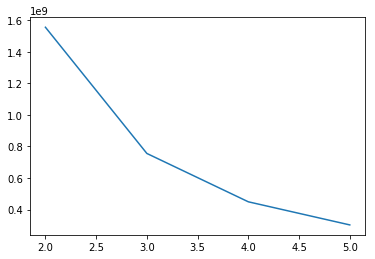

In [123]:
plt.plot(list(range(2,6)),a)

#### appropriate clusters= 4

In [100]:
from sklearn.metrics import silhouette_score
km.labels_

array([0, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 3,
       1, 0, 0, 0, 0, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [111]:
s=silhouette_score(df_with_dummies,labels=km.labels_)
s

0.5593060467366295